In [133]:
def build_roas_curve( m, b, x ):
    roas = ( m * x ) + b
    if roas > 0:
        return roas
    return None

x_range = [ x for x in range( 1, 365) ]

roas_curve_1 = [ build_roas_curve( -2, 300, x ) for x in x_range ]
roas_curve_2 = [ build_roas_curve( -3, 400, x ) for x in x_range ]

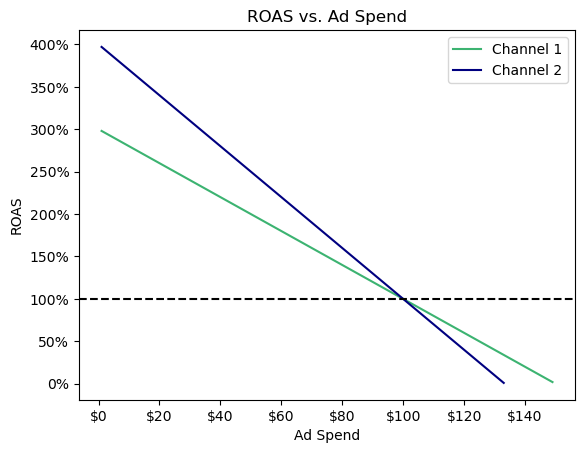

In [134]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

plt.plot(x_range, roas_curve_1, color='mediumseagreen', label='Channel 1' )
plt.plot(x_range, roas_curve_2, color='navy', label='Channel 2' )
plt.axhline( y=100, color='black', linestyle='dashed' )
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.gca().xaxis.set_major_formatter('${x:1.0f}')

plt.title("ROAS vs. Ad Spend", loc = 'center')
plt.xlabel("Ad Spend")
plt.ylabel("ROAS")

plt.legend(loc="upper right")



Optimal Spend Level, Channel 1:  $75
Optimal Spend Level, Channel 2:  $66


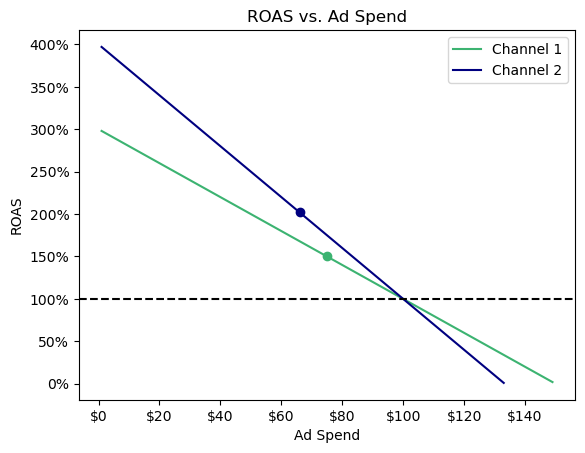

In [135]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

plt.plot(x_range, roas_curve_1, color='mediumseagreen', label='Channel 1' )
plt.plot(x_range, roas_curve_2, color='navy', label='Channel 2' )
plt.axhline( y=100, color='black', linestyle='dashed' )
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.gca().xaxis.set_major_formatter('${x:1.0f}')

plt.title("ROAS vs. Ad Spend", loc = 'center')
plt.xlabel("Ad Spend")
plt.ylabel("ROAS")

plt.legend(loc="upper right")

max_profit = 0
max_profit_spend_1 = 0
max_profit_spend_2 = 0
profit_value_1 = 0
profit_value_2 = 0
max_profit_value_1 = 0
max_profit_value_2 = 0

#profit max
for i in x_range:
    for z in x_range:
        if roas_curve_1[ i - 1 ] is not None:
            profit_value_1 = roas_curve_1[ i - 1 ] * i - i
        if roas_curve_2[ z - 1 ] is not None:
            profit_value_2 = roas_curve_2[ z - 1 ] * z - z
        if profit_value_1 + profit_value_2 > max_profit:
            max_profit = profit_value_1 + profit_value_2
            max_profit_spend_1 = i
            max_profit_spend_2 = z
            max_profit_value_1 = profit_value_1
            max_profit_value_2 = profit_value_2

plt.plot( max_profit_spend_1, roas_curve_1[ max_profit_spend_1 - 1], 'o', color='mediumseagreen' )
plt.plot( max_profit_spend_2, roas_curve_2[ max_profit_spend_2 - 1], 'o', color='navy' )
            
print( "Optimal Spend Level, Channel 1: " + " $" + str( max_profit_spend_1 ) )
print( "Optimal Spend Level, Channel 2: " + " $" + str( max_profit_spend_2 ) )
